In [2]:
from sklearn import datasets		# 存放鸢尾花数据
from sklearn.cluster import KMeans	# 机器学习模型
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()
iris_X = iris.data				# 花朵属性
iris_y = iris.target			# 花朵类别


# 原始数据的特征散点图
plt.scatter(iris_X[:50,2],iris_X[:50,3],label='setosa',marker='o',c='yellow')
plt.scatter(iris_X[50:100,2],iris_X[50:100,3],label='versicolor',marker='o',c='green')
plt.scatter(iris_X[100:,2],iris_X[100:,3],label='virginica',marker='o',c='blue')




In [3]:
km = KMeans(n_clusters=3)			# 设定簇的定值为3 
km.fit(iris_X)						# 对数据进行聚类

#num存储每个簇中的样本数量 
num = pd.Series(km.labels_).value_counts()
print(num)

#将聚类结果存储在y_train中
y_train = pd.Series(km.labels_)
y_train.rename('res',inplace=True)
print(y_train)  #显示每个样本的簇



0    62
1    50
2    38
dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: res, Length: 150, dtype: int32


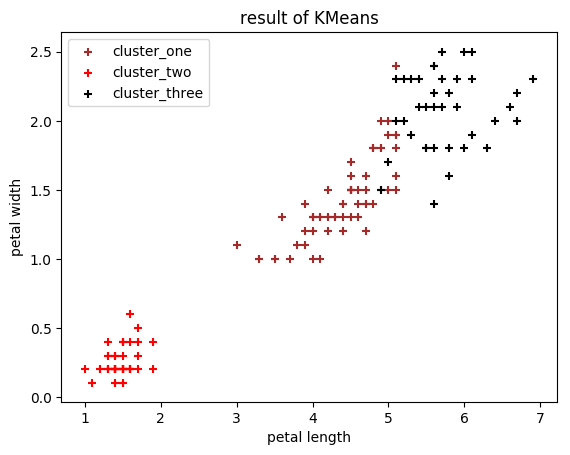

In [4]:
result = pd.concat([pd.DataFrame(iris_X),y_train],axis=1)
#print(result)

#进行数据分类 重新打标签 0 1 2
Category_one = result[result['res'].values == 0]
k1 = result.iloc[Category_one.index]
# print(k1)
Category_two = result[result['res'].values == 1]
k2 = result.iloc[Category_two.index]
# print(k2)
Category_three = result[result['res'].values == 2]
k3 =result.iloc[Category_three.index]
# print(k3)

# 机器学习后数据的特征散点图
plt.scatter(k1.iloc[:,2],k1.iloc[:,3],label='cluster_one',marker='+',c='brown')
plt.scatter(k2.iloc[:,2],k2.iloc[:,3],label='cluster_two',marker='+',c='red')
plt.scatter(k3.iloc[:,2],k3.iloc[:,3],label='cluster_three',marker='+',c='black')
plt.xlabel('petal length')			# 花瓣长
plt.ylabel('petal width')			# 花瓣宽
plt.title("result of KMeans")
plt.legend()
plt.show()

![](https://ai-studio-static-online.cdn.bcebos.com/82cea54541904b59ad689bf0ae6e87c73a84da36cee24be491e5d4388b863195)
![](https://ai-studio-static-online.cdn.bcebos.com/4b6cdef2295f43f59d774f9097cb6354466e163286054c05ad93944bca3407f0)
![](https://ai-studio-static-online.cdn.bcebos.com/8c29abbe38aa4e40bb0d86f28ca657194c09cf3236f24838aec8e47cf934b30f)


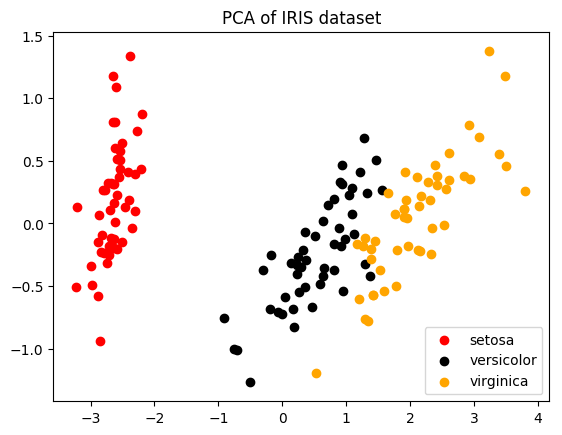

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # 实例化 n_components:降维后需要的维度，即需要保留的特征数量
pca = pca.fit(iris_X)  # 拟合模型
X_dr = pca.transform(iris_X)  # 获取新矩阵
 
# 对三种鸢尾花分别绘图
colors = ['red', 'black', 'orange']
# iris.target_names
plt.figure()  # 画布
for i in [0, 1, 2]:
    plt.scatter(X_dr[iris_y == i, 0] , X_dr[iris_y == i, 1] , alpha=1 , c=colors[i] , label=iris.target_names[i])
plt.legend()  # 显示图例
plt.title('PCA of IRIS dataset')  # 设置标题
plt.show()  # 画图

![](https://ai-studio-static-online.cdn.bcebos.com/5870b39283284b1cb223167802e3c1d181796ac05024486a9b8c0610c942a1ba)
